# 데이터사이언스 (0010085001)

## Exercise 13: Logistic Regression

In this excercise, we will implement the logistic regression algorithm.

* Logistic regression aims to estimate the parameters of a logistic model (the coefficient in the linear combination).

In [1]:
import numpy as np
import sklearn.datasets

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Half moon 데이터 생성 (linear classification 과 동일)

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

# numpy 시드 고정 -> 난수의 생성 패턴을 동일하게 관리
np.random.seed(0)

# 데이터 생성
X, y = sklearn.datasets.make_moons(100, noise=0.1)

# 데이터 크기 및 샘플 확인
print(X[:5])
print(y[:5])
print(X.shape, y.shape)

[[-0.05348369  0.99258199]
 [ 1.81989987 -0.17559999]
 [ 0.95535658  0.05999942]
 [ 0.01558147  0.11081703]
 [ 0.96454939 -0.51276464]]
[0 1 0 1 1]
(100, 2) (100,)


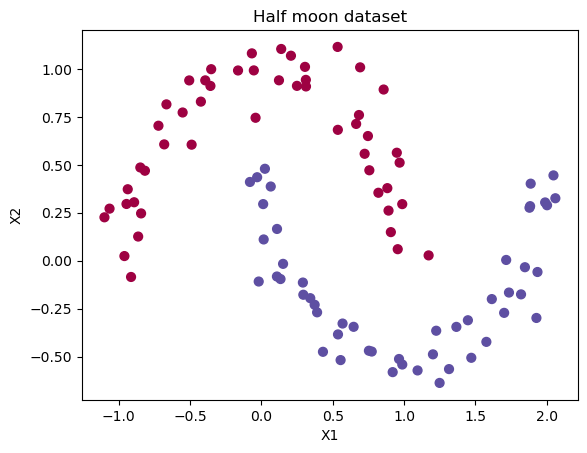

In [3]:
# 데이터 시각화

plt.scatter(X[:, 0], X[:,1], 
            s=40, 
            c=y,
            cmap=plt.cm.Spectral)

plt.title("Half moon dataset")
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

In [4]:
# Logistic (sigmoid) 함수 정의

# https://en.wikipedia.org/wiki/Logistic_function

def logistic_function(x):

    return 1/ (1 + np.exp(-x))

In [5]:
# Logistic 함수 테스트

output = logistic_function (0)
print(output)

output = logistic_function (10)
print(output)

output = logistic_function (-10)
print(output)

0.5
0.9999546021312976
4.5397868702434395e-05


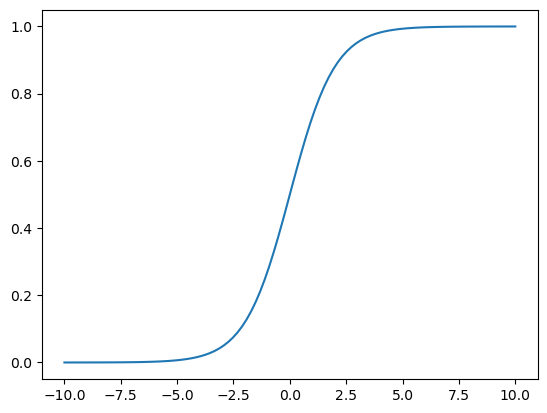

In [6]:
# Logistic 함수 그리기

x_hyperplane = np.linspace(-10, 10, 100)
y_hyperplane = logistic_function(x_hyperplane)

plt.figure()
plt.plot(x_hyperplane, y_hyperplane)
plt.show()

In [7]:
# Error function (cost function; in-sample error) 함수 정의

def compute_cost(theta, x, y_true):
    # 데이터의 수
    N = len(y_true)

    # signal 을 logistic function 에 넣어 예측값 (예측 확률) 계산
    y_pred = logistic_function(np.dot(x , theta))

    # cross-entropy 에러 계산
    # p * log(1 / q) + (1 - p) * log(1 / (1 - q)) ... cross entropy 의 정의
    # error = (y_true * np.log(1 / y_pred)) - ((1 - y_true) * np.log(1 / (1 - y_pred)))
    error = (y_true * np.log(y_pred)) + ((1 - y_true) * np.log(1 - y_pred))

    cost = -1 / N * sum(error)
    
    gradient = 1 / N * np.dot(x.transpose(), (y_pred - y_true))

    return cost[0] , gradient

In [8]:
# Cost 및 gradient 초기화

# 데이터 정규화
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)
normalized_X = (X - mean_X) / std_X

rows = X.shape[0]
cols = X.shape[1]

# oneVector 를 추가하는 과정 (linear classification 과 동일)
X_ = np.append(np.ones((rows, 1)), normalized_X, axis=1)
y = y.reshape(rows, 1)

# 가중치 (theta 초기화)
theta_init = np.zeros((cols + 1, 1))

# 0-th step 에서 cost 및 gradient 계산
cost, gradient = compute_cost(theta_init, X_, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[ 0.        ]
 [-0.28037017]
 [ 0.37428558]]


In [9]:
# Gradient descent 함수 정의

def gradient_descent(x, y, theta, learning_rate, iterations):
    costs = []

    for i in range(iterations):
        # 주어진 데이터에 대한 cost 와 gradient 값 계산
        cost, gradient = compute_cost(theta, x, y)

        # w(t+1) <- w(t) - learning_rate * gradient
        theta -= (learning_rate * gradient)
        
        # cost 에 대한 plot 을 그리기 위해 계산한 값을 costs 에 저장
        costs.append(cost)
        
    return theta, costs

In [10]:
# Gradient descent 알고리즘 수행

# learning_rate: 1, iterstions: 200
theta, costs = gradient_descent(X_, y, theta_init, 1, 200)
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[ 0.03626704]
 [ 1.0960778 ]
 [-2.92461557]]
Resulting cost: 0.25945106212707464


Text(0, 0.5, '$J(\\Theta)$')

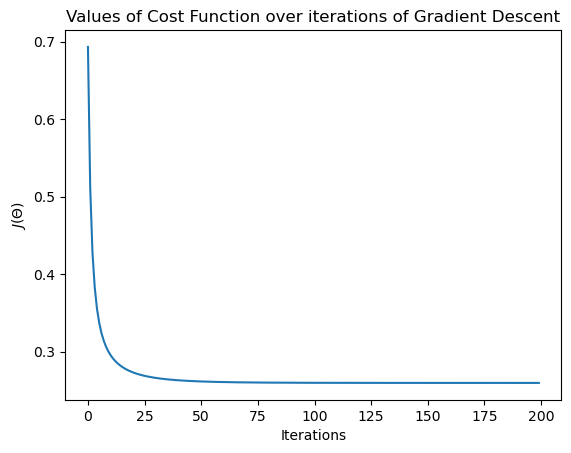

In [11]:
# 각 iteration 에 대한 cost 값 그리기

plt.plot(costs)

plt.title("Values of Cost Function over iterations of Gradient Descent");
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")

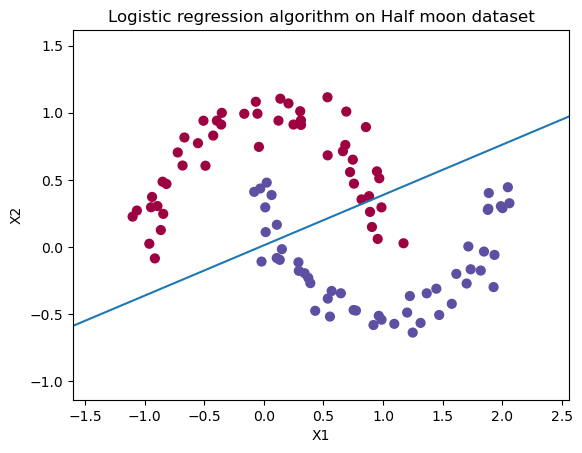

In [12]:
# Logistic regression algorithm 으로 학습된 decision boundary 그리기

# 그려질 그래프의 두 축의 최대, 최소값 설정
max_x = np.max(X[:, 0])
min_x = np.min(X[:, 0])

max_y = np.max(X[:, 1])
min_y = np.min(X[:, 1])

# Half moon 데이터 그리기
plt.scatter(X[:, 0], X[:,1], 
            s=40, 
            c=y,
            cmap=plt.cm.Spectral)


# Decision boundary 그리기
x_hyperplane = np.linspace(-2, 3, 10)
y_hyperplane = -(theta[0] + theta[1] * x_hyperplane) / theta[2]

plt.plot(x_hyperplane, y_hyperplane, '-')
plt.title("Logistic regression algorithm on Half moon dataset")
plt.xlabel("X1")
plt.ylabel("X2")

plt.xlim((min_x - 0.5, max_x + 0.5))
plt.ylim((min_y - 0.5, max_y + 0.5))

plt.show()

In [13]:
# 계산된 최적의 가중치 (theta) 이용하여 예측 수행하기

# 에측을 위한 함수 설정 (예측 자체는 linear classification 과 동일)
def predict(theta, x):
    results = x.dot(theta)
    return results > 0

# 주어진 데이터에 대한 예측 수행
p = predict(theta, X_)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 88 %
